## Logistic regression for fabrication

### Load the data and perform a preliminary investigation

m = 118 training examples
n = 2 features


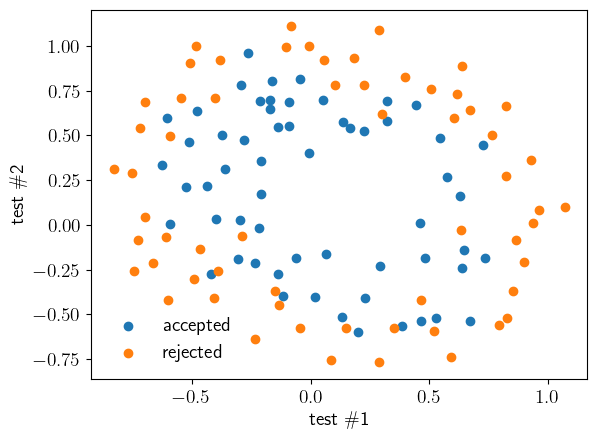

In [1]:
%run ../src.ipynb
%run ../utils.ipynb

data = np.loadtxt("../../data/fabricationTests.txt", delimiter=',')
x = data[:,0:-1]
y = data[:,-1]

m, n = x.shape
print(f"m = {m} training examples")
print(f"n = {n} features")

def PLOT(x):
    pos = y == 1
    neg = y != 1

    plt.scatter(x[pos,0],x[pos,1],label='accepted')
    plt.scatter(x[neg,0],x[neg,1],label='rejected')
    plt.xlabel("test \#1")
    plt.ylabel("test \#2")
    plt.legend(frameon=False)
    
PLOT(x)
plt.show()

## Feature mapping
Clearly a linear decision boundary will not cut it. So wee need engineering features.

Iteration      0: Cost = 0.76610
Iteration   1000: Cost = 0.43615
Iteration   2000: Cost = 0.38878
Iteration   3000: Cost = 0.36866
Iteration   4000: Cost = 0.35790
Iteration   5000: Cost = 0.35138
Iteration   6000: Cost = 0.34709
Iteration   7000: Cost = 0.34410
Iteration   8000: Cost = 0.34190
Iteration   9000: Cost = 0.34024
w = [-0.90278378  0.14622184 -5.4868596  -4.88178456 -5.90512736 -0.30424066
  0.22470455  0.93382771 -1.5238684  -5.07545422  0.51042478 -2.0110447
 -2.15234412 -3.7787392 ], b = 4.0721582252536725


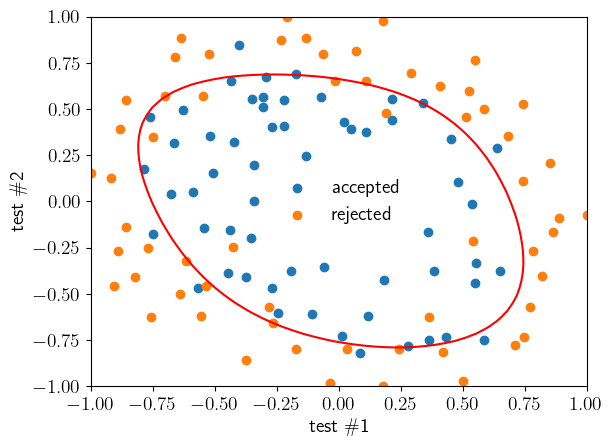

The training accuracy is 83.90%


In [2]:
N = 4 # highest degree of engineered features
# scale before mapping
maxVal = x.max(0)
minVal = x.min(0)
xScaled = -1+2*(x-minVal)/(maxVal-minVal)

xScaledMapped = feature_mapping(xScaled,N)

# perform gradient descent
np.random.seed(1)
w0 = np.random.rand(xScaledMapped.shape[1])-0.5
b0 = 1

alpha = 1e-1
numberIterations = 10000
w,b,J = gradient_descent(xScaledMapped,y,w0,b0,alpha,numberIterations,logistic_regression_cost,logistic_regression_gradient);
print(f"w = {w}, b = {b}")

yhat = prediction_logistic_regression(w,b,xScaledMapped)

PLOT(xScaledMapped[:,0:2])
# decision boundary is given by z = 0
plot_decision_boundary(N,w,b)
plt.show()

# accuracy:
print(f"The training accuracy is {np.mean(yhat == y)*100:0.2f}%")